# PW Dual Hamiltonian

In [5]:
import cirq
import numpy as np
import cirq_qubitization
import cirq_qubitization.cirq_infra.testing as cq_testing
from cirq_qubitization.jupyter_tools import display_gate_and_compilation, show_bloq
from typing import *

## `SelectChem`
#### Parameters
 - `cv1`: Whether the first bit is a positive control.
 - `cv2`: Whether the second bit is a positive control. 

Registers:

References:

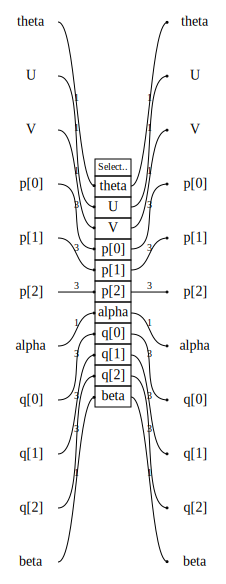

In [6]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import SelectChem

M = 8
bloq = SelectChem(8)
show_bloq(bloq)

## `PrepareChem`
#### Parameters
 - `cv1`: Whether the first bit is a positive control.
 - `cv2`: Whether the second bit is a positive control. 

Registers:
 - p: A two-bit control register.
 - (right) target: The output bit.

#### References
(Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity)[https://arxiv.org/abs/1805.03662]. Babbush et. al. 2018. Section III.A. and Fig. 4. (Verifying Measurement Based Uncomputation)[https://algassert.com/post/1903]. Gidney, C. 2019.


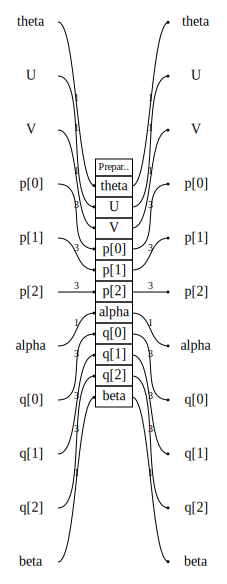

In [7]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import PrepareChem

M = 8
bloq = PrepareChem(M)
show_bloq(bloq)

## `UnaryIteration`
Placeholder for unary iteration bloq
#### References
(Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity)[https://arxiv.org/abs/1805.03662]. Babbush et. al. 2018. Section III.A. and Fig. 4.


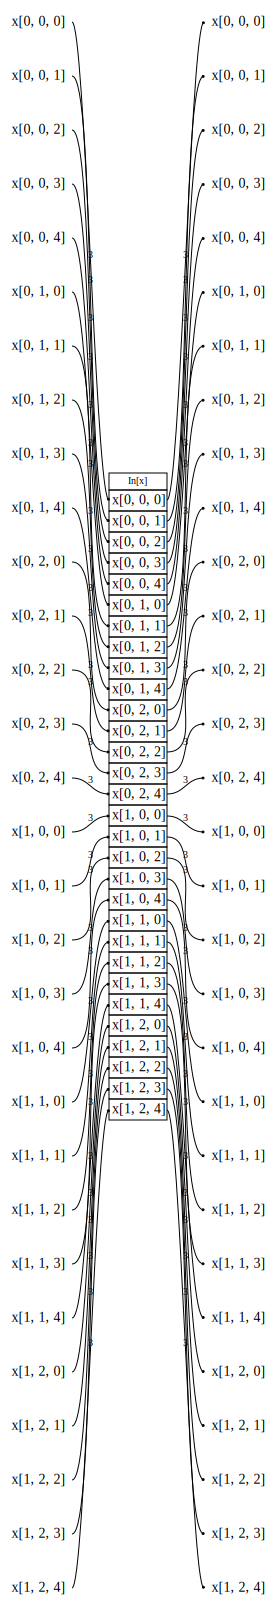

In [9]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import UnaryIteration

shape = (2, 3, 5)
bloq = UnaryIteration(shape)
show_bloq(bloq)